<a href="https://colab.research.google.com/github/JuliaJakimowicz/SystemyUcz-ceSi-AnalizaDanych/blob/main/SUSAD_LAB_1_Przyk%C5%82ady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalacja i import bibliotek

In [1]:
# Instalacja brakujących pakietów (jeśli uruchamiasz w Google Colab)
!pip install pandas numpy matplotlib seaborn scikit-learn missingno

# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Wizualizacja brakujących danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy import stats


📌 Dokumentacja:

Pandas: https://pandas.pydata.org
Seaborn: https://seaborn.pydata.org
Scikit-learn: https://scikit-learn.org/stable/


# 2. Wczytanie zbioru Titanic i eksploracja danych

In [3]:
# Wczytanie zbioru Titanic
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

# Podgląd pierwszych 5 wierszy
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


📌 Dokumentacja:

pd.read_csv(): https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# 3. Podstawowe statystyki

In [5]:
# Opis statystyczny danych
print(df.describe())

# Sprawdzenie typów danych i brakujących wartości
print(df.info())
print(df.isnull().sum())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non

📌 Dokumentacja:

df.describe(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# 4. Wizualizacja brakujących wartości

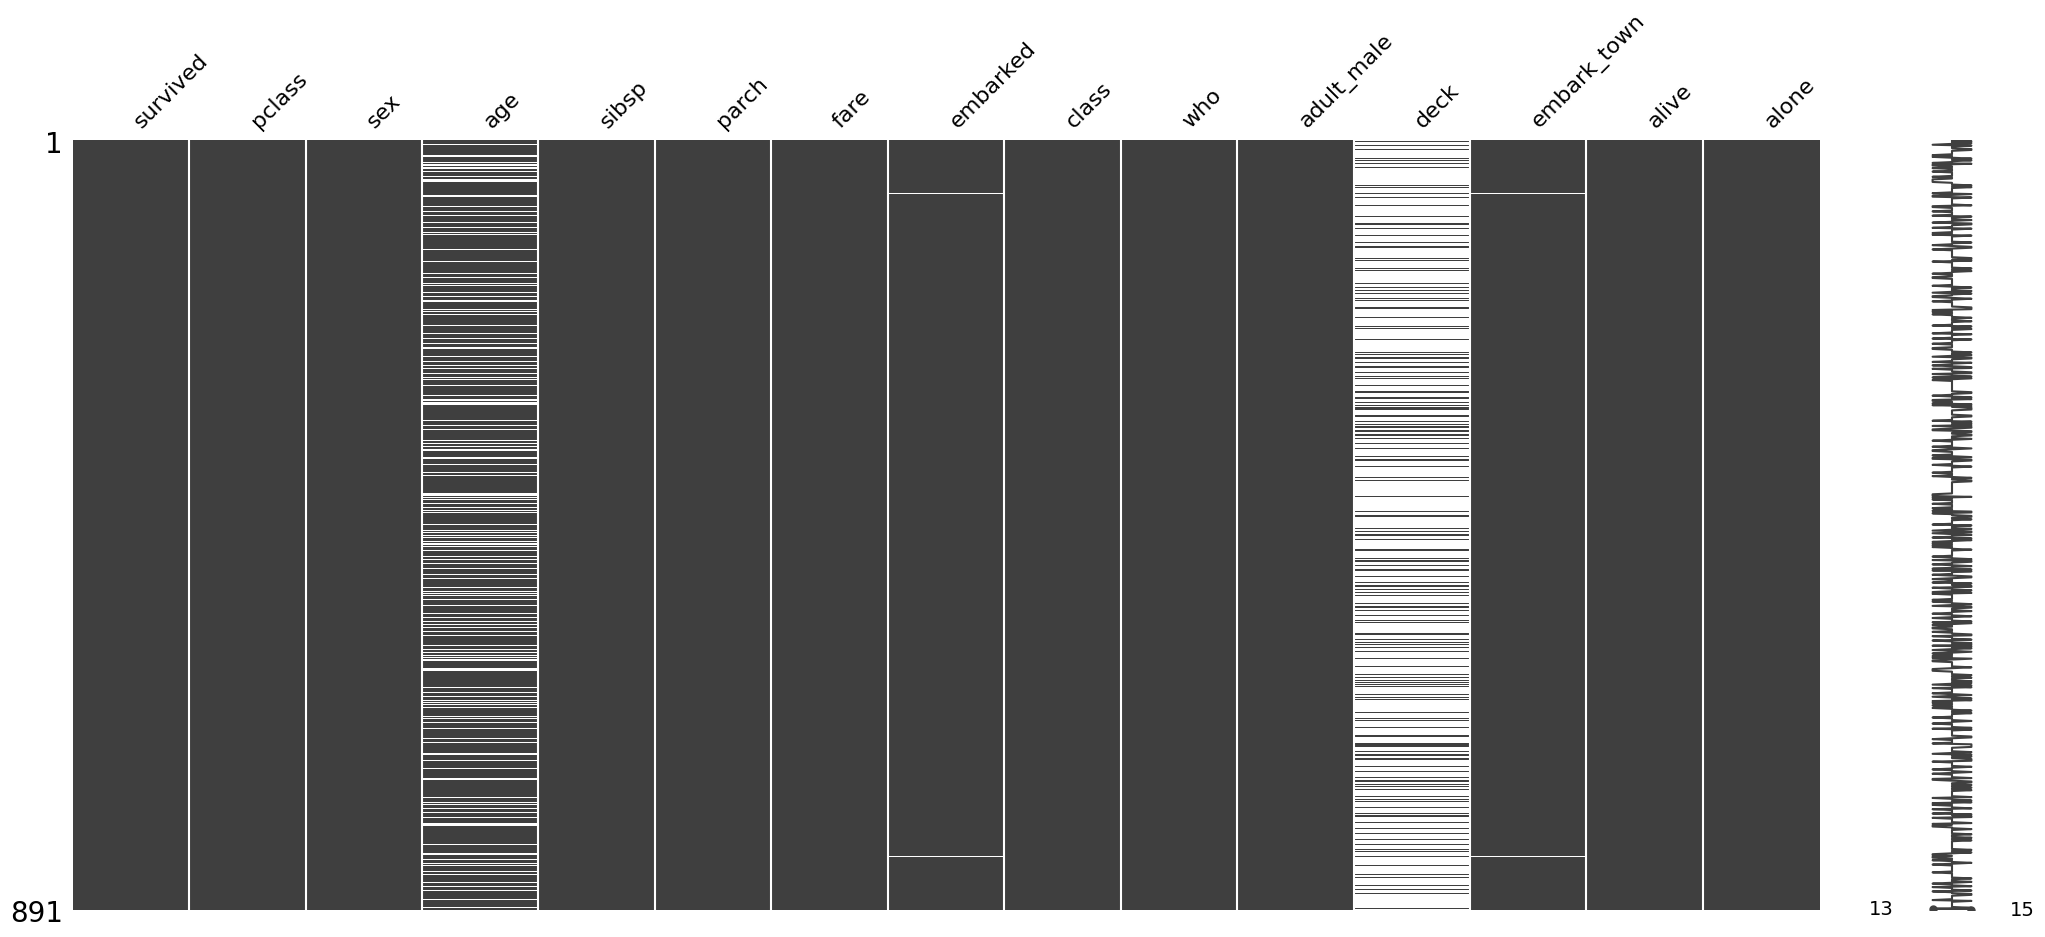

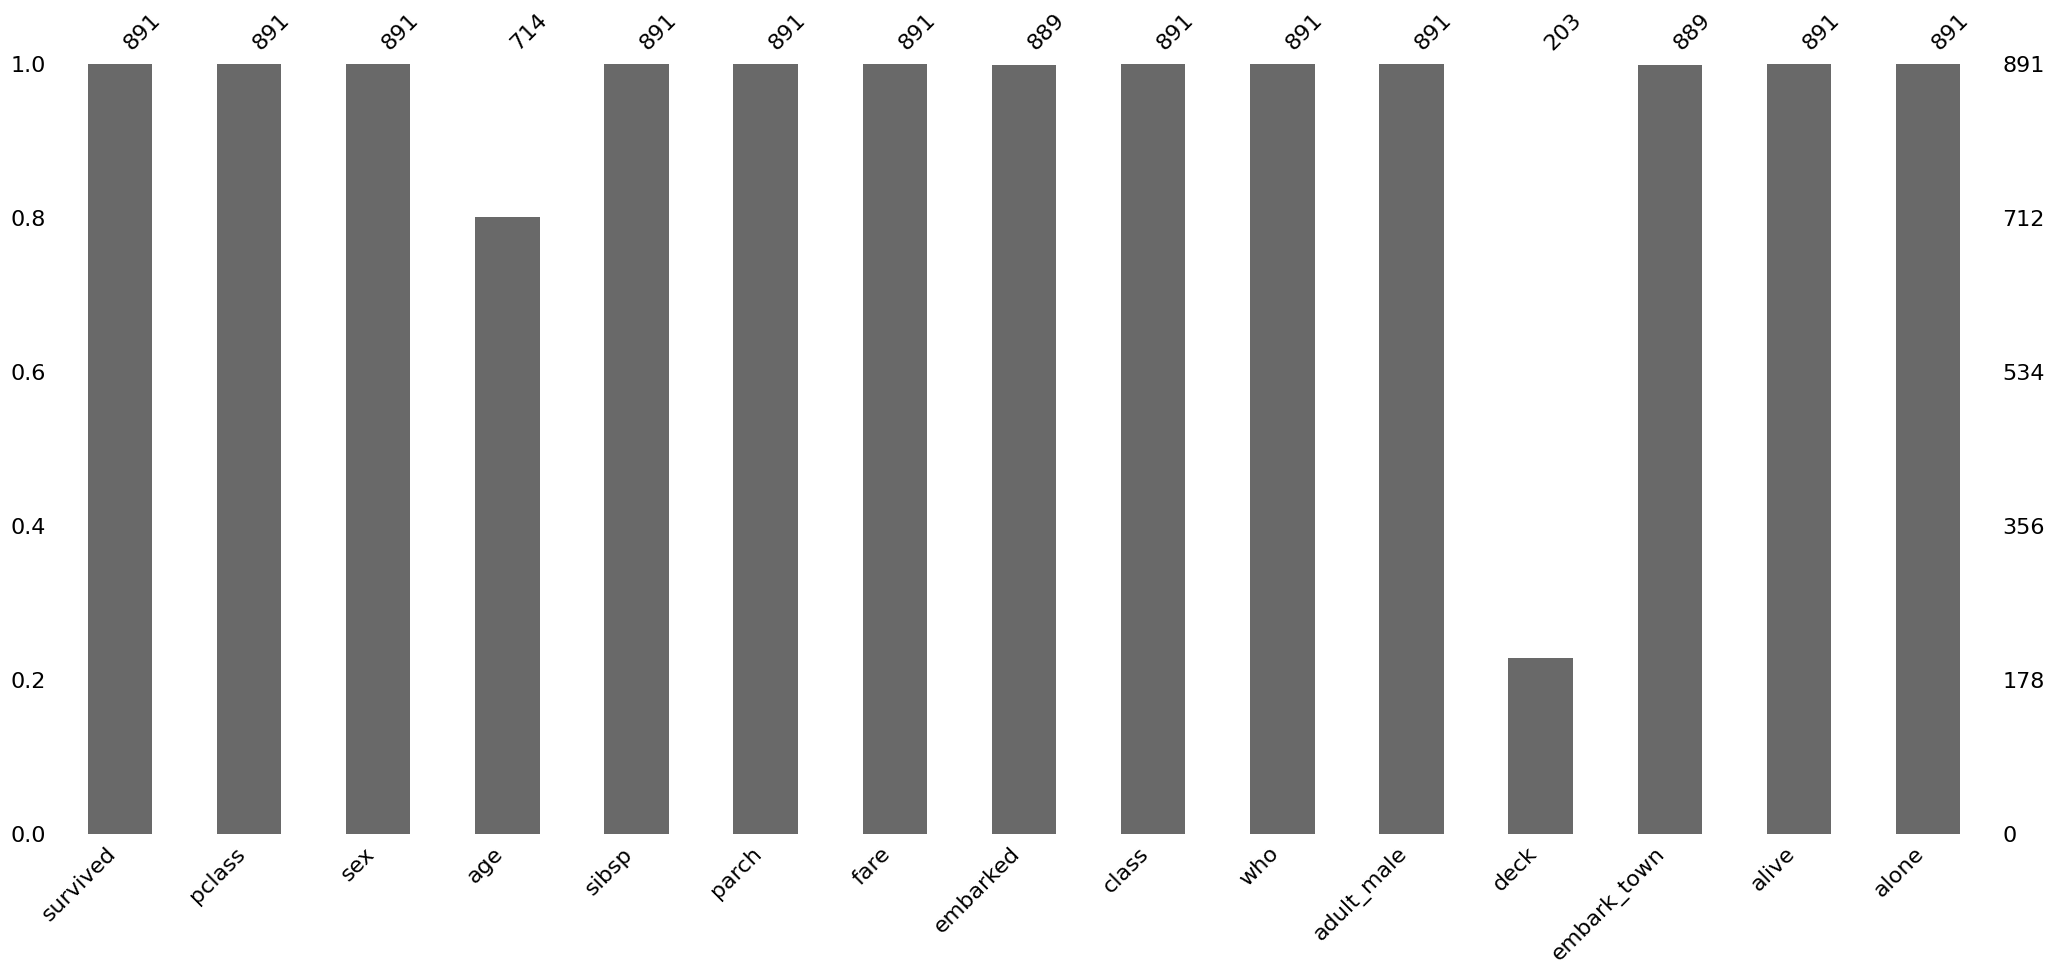

In [6]:
# Wizualizacja brakujących danych
msno.matrix(df)
plt.show()

# Wykres słupkowy braków danych
msno.bar(df)
plt.show()

📌 Dokumentacja:

missingno: https://github.com/ResidentMario/missingno
plt.show: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

# 5. Uzupełnianie brakujących danych

In [7]:
# Uzupełnianie wieku medianą
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())

# Uzupełnianie "embark_town" najczęstszą wartością
df.loc[:, 'embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Sprawdzenie ponownie brakujących wartości
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


📌 Dokumentacja:

fillna(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

# 6. Normalizacja i standaryzacja

In [10]:
# Skalowanie wieku
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

# Normalizacja ceny biletu
min_max_scaler = MinMaxScaler()
df['fare_scaled'] = min_max_scaler.fit_transform(df[['fare']])


📌 Dokumentacja:

StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# 7. Kodowanie zmiennych kategorycznych

In [11]:
# Label Encoding dla płci
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# OneHotEncoding dla klasy biletu
df = pd.get_dummies(df, columns=['class'], drop_first=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,age_scaled,fare_scaled,sex_encoded,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,-0.565736,0.014151,1,False,True
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,0.663861,0.139136,0,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,-0.258337,0.015469,0,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,0.433312,0.103644,0,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,0.433312,0.015713,1,False,True


📌 Dokumentacja:

LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# 8. Analiza korelacji

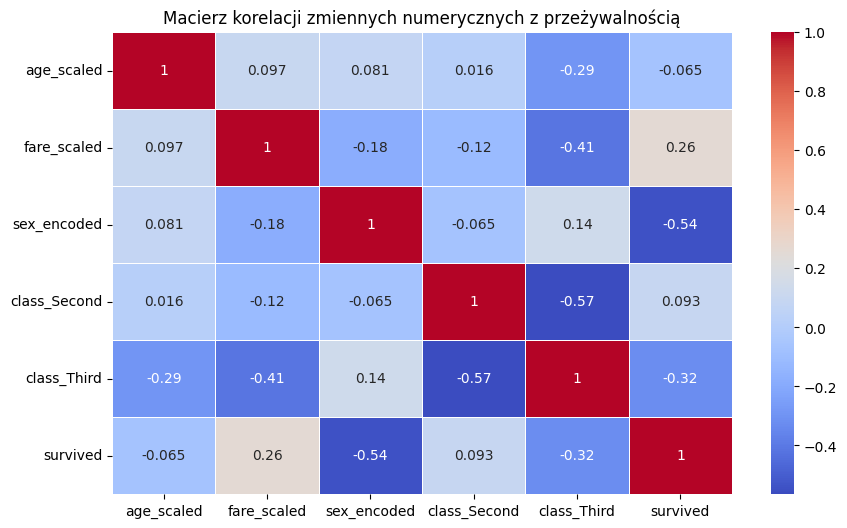

In [12]:


# Wybór zmiennych numerycznych oraz zmiennej docelowej "survived"
selected_features = ['age_scaled', 'fare_scaled', 'sex_encoded', 'class_Second', 'class_Third', 'survived']

# Macierz korelacji z uwzględnieniem zmiennej docelowej
plt.figure(figsize=(10,6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Macierz korelacji zmiennych numerycznych z przeżywalnością")
plt.show()


📌 Dokumentacja:

sns.heatmap(): https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure():https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

# 9. Wykrywanie wartości odstających

age      7
fare    20
dtype: int64


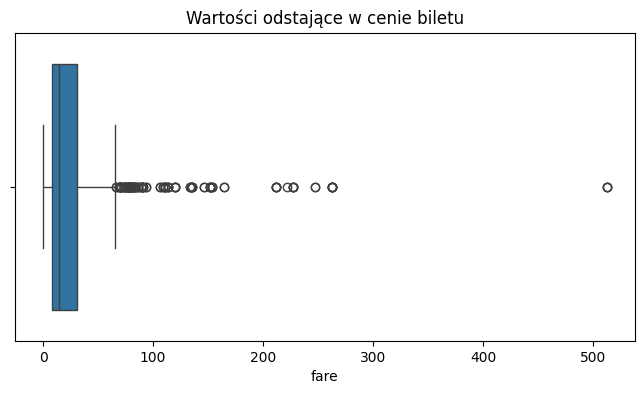

In [13]:
# Z-score do wykrywania outlierów
z_scores = np.abs(stats.zscore(df[['age', 'fare']]))
print((z_scores > 3).sum(axis=0))

# Wizualizacja wartości odstających
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fare'])
plt.title("Wartości odstające w cenie biletu")
plt.show()

📌 Dokumentacja:

scipy.stats.zscore: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.zscore.html
sns.boxplot(): https://seaborn.pydata.org/generated/seaborn.boxplot.html

# 10. Dyskretyzacja danych

In [14]:
# Grupowanie wieku w przedziały
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 80], labels=['Dziecko', 'Młody', 'Dorosły', 'Starszy'])
df[['age', 'age_group']].head()


,age,age_group
0,22.0,Młody
1,38.0,Dorosły
2,26.0,Młody
3,35.0,Młody
4,35.0,Młody


📌 Dokumentacja:

pd.cut(): https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# 11. Wykrywanie wzorców i trendów

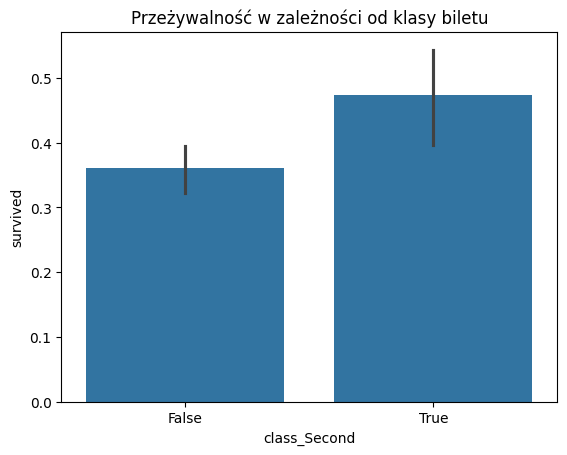

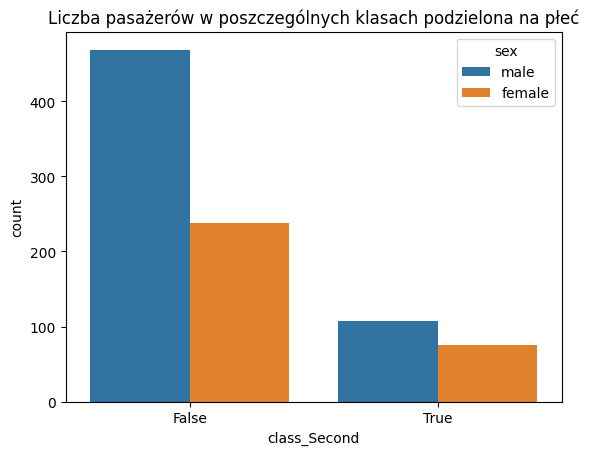

In [15]:
# Zależność między klasą biletu a przeżywalnością
sns.barplot(x='class_Second', y='survived', data=df)
plt.title("Przeżywalność w zależności od klasy biletu")
plt.show()

# Wykres liczby pasażerów w poszczególnych klasach
sns.countplot(x='class_Second', hue='sex', data=df)
plt.title("Liczba pasażerów w poszczególnych klasach podzielona na płeć")
plt.show()

📌 Dokumentacja:

sns.countplot(): https://seaborn.pydata.org/generated/seaborn.countplot.html

# 12. Podział danych na zbiór treningowy i testowy

In [18]:
# Wybór cech
features = ['age_scaled', 'fare_scaled', 'sex_encoded', 'class_Second', 'class_Third']
X = df[features]
y = df['survived']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (712, 5)
Rozmiar zbioru testowego: (179, 5)


📌 Dokumentacja:

train_test_split(): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html